In [1]:
import cmlreaders as cml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings; warnings.simplefilter('ignore')
pd.options.display.max_columns=None
pd.options.display.max_rows=100
from IPython.display import display, Markdown, HTML
import pandas_to_pybeh as pb
from tqdm import tqdm_notebook as lol
import time
import scipy
import rep_pybeh as rpb
from plotting import *
error_bars ={'elinewidth':3, 'capsize':5, 'capthick':3}
data_set = 'hospital'

In [5]:
scalp = pd.read_csv('scalp_reps.csv', index_col = 0)
hosp = pd.read_csv('hospital_reps.csv', index_col = 0)
mturk = pd.read_csv('Mturk_reps.csv', index_col = 0)
scalp.subject.nunique(), hosp.subject.nunique(), mturk.subject.nunique()

(7, 36, 314)

In [6]:
def plot_rep_eff(reps, data_set, marker, color):
    # g = sns.lineplot(data=scatter_reps, x = 'repeats', y = 'recalled', ci = 95, hue = 'subject', palette = palette, **dict(alpha=0.3), legend=None)
    g = sns.scatterplot(data=reps.groupby('repeats').mean().reset_index(), marker = marker,
                        x = 'repeats', y = 'recalled', color = color, s= 50, label = data_set, edgecolor="black", zorder=10)
    g = sns.lineplot(data=reps, x = 'repeats', y = 'recalled', err_style = 'bars',
                    ci = 95, color = color, linewidth = 3.5, err_kws = error_bars, zorder=0)
    _ = plt.ylabel('Recall Probability')
    _ = plt.xlabel('Number of Presentations')
#     plt.savefig(data_set+'_figs/recall_by_pres.pdf', bbox_inches='tight')

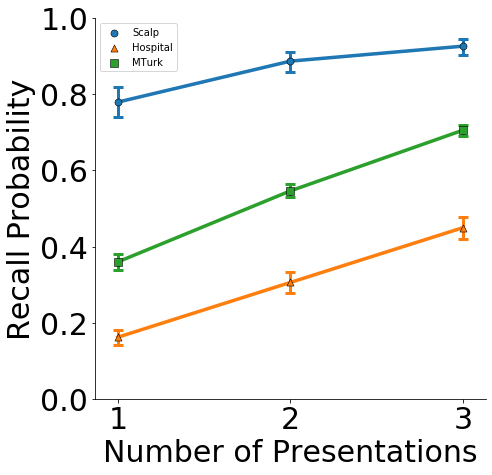

In [7]:
set_axes(fontsize = 30, ylim = [0,1], xticks = np.arange(1, 4, 1))
plot_rep_eff(scalp, 'Scalp', 'o', 'C0')
plot_rep_eff(hosp, 'Hospital', '^', 'C1')
plot_rep_eff(mturk, 'MTurk', 's', 'C2')
plt.savefig('all_studies_reps.pdf', bbox_inches= 'tight')